## Due Wednesday Sept 11, 2013 @ 5pm ##

Send us an email `ucbpythonclass+seminar@gmail.com` (with a tarball of notebook/code/files)

## Super-resolution imaging ##

Obtaining several snapshots of the same scene, from microscopes to telescopes, is useful for the postprocessing increase of signal to noise: by summing up imaging data we can effectively beat down the noise. Interestingly, if we image the same scene from different vistas we can also improve the clarity of the combined image. Being able to discern features in a scene from this combination effort is sometimes called super-resolution imaging.

Here, we'll combine about 4 seconds of a shaky video to reveal the statement on a license plate that is not discernable in any one frame.

<img src="files/hw_0_data/im2-1.png">

A tarball of the data is at: https://www.dropbox.com/s/0clmmvwkoy000d4/homework1_data.tgz

1) Resize each frame to be 3 times larger in each axis (ie. 9 times larger images). Using `scipy.signal.correlate2d` find the offsets of each frame with respect to the first frame. Report those offsets to 2 decimal places.

2) shift each image to register the frames to the original (expanded in size) frame. You should, in general, be shifting by subpixel offsets.

3) Combine all the registered images to form a super-resolution image. What does the license plate read?

In [1]:
#### ------------- Task 1 ------------- #####
# 1) Resize each frame to be 3 times larger in each axis (ie. 9 times larger images). Using scipy.signal.correlate2d 
# find the offsets of each frame with respect to the first frame. Report those offsets to 2 decimal places.

In [2]:
%pylab inline
from scipy.ndimage import imread
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.signal.signaltools import correlate2d

In [4]:
!pwd

/Users/farahshih/Documents/Codes/Python_For_Data_Science/Fu-Chi/Homework1


In [5]:
cd ~/Documents/Codes/Python_For_Data_Science/Kevin/Homework1/Data

/Users/farahshih/Documents/Codes/Python_For_Data_Science/Kevin/Homework1/Data


In [6]:
ls

im1-a.png   im2-20.png  im2-37.png  im2-53.png  im2-7.png   im2-86.png
im1-b.png   im2-21.png  im2-38.png  im2-54.png  im2-70.png  im2-87.png
im1-c.png   im2-22.png  im2-39.png  im2-55.png  im2-71.png  im2-88.png
im1-d.png   im2-23.png  im2-4.png   im2-56.png  im2-72.png  im2-89.png
im1-e.png   im2-24.png  im2-40.png  im2-57.png  im2-73.png  im2-9.png
im2-0.png   im2-25.png  im2-41.png  im2-58.png  im2-74.png  im2-90.png
im2-1.png   im2-26.png  im2-42.png  im2-59.png  im2-75.png  im2-91.png
im2-10.png  im2-27.png  im2-43.png  im2-6.png   im2-76.png  im2-92.png
im2-11.png  im2-28.png  im2-44.png  im2-60.png  im2-77.png  im2-93.png
im2-12.png  im2-29.png  im2-45.png  im2-61.png  im2-78.png  im2-94.png
im2-13.png  im2-3.png   im2-46.png  im2-62.png  im2-79.png  im2-95.png
im2-14.png  im2-30.png  im2-47.png  im2-63.png  im2-8.png   im2-96.png
im2-15.png  im2-31.png  im2-48.png  im2-64.png  im2-80.png  im2-97.png
im2-16.png  im2-32.png  im2-49.png  im2-65.png  im2-81.png  im2-98.png
im2-17.

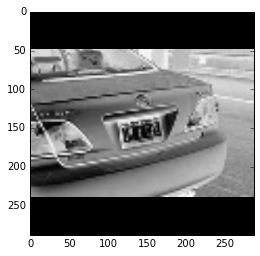

In [7]:
im1=imread("im2-1.png",flatten=True)
imshow(im1,cmap=cm.Greys)

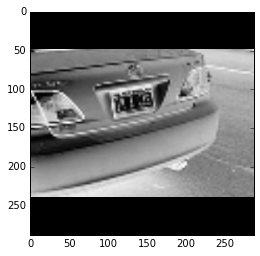

In [8]:
im2=imread("im2-2.png",flatten=True)
imshow(im2,cmap=cm.Greys)

In [9]:
im2

array([[ 255.,  255.,  255., ...,  255.,  255.,  255.],
       [ 255.,  255.,  255., ...,  255.,  255.,  255.],
       [ 255.,  255.,  255., ...,  255.,  255.,  255.],
       ..., 
       [ 255.,  255.,  255., ...,  255.,  255.,  255.],
       [ 255.,  255.,  255., ...,  255.,  255.,  255.],
       [ 255.,  255.,  255., ...,  255.,  255.,  255.]], dtype=float32)

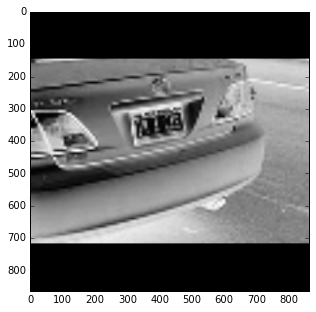

In [45]:
im2_rs = sp.misc.imresize(im2,300)
imshow(im2_rs, cmap=cm.Greys)

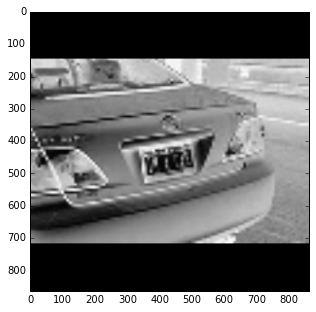

In [44]:
im1_rs = sp.misc.imresize(im1,300)
imshow(im1_rs, cmap=cm.Greys)

In [12]:
c12_f = correlate2d(im1, im2, mode="full") # if using the enlarged images, the computation time is much longer...

In [13]:
c12_f

array([[  65025.,  130050.,  195075., ...,  195075.,  130050.,   65025.],
       [ 130050.,  260100.,  390150., ...,  390150.,  260100.,  130050.],
       [ 195075.,  390150.,  585225., ...,  585225.,  390150.,  195075.],
       ..., 
       [ 195075.,  390150.,  585225., ...,  585225.,  390150.,  195075.],
       [ 130050.,  260100.,  390150., ...,  390150.,  260100.,  130050.],
       [  65025.,  130050.,  195075., ...,  195075.,  130050.,   65025.]], dtype=float32)

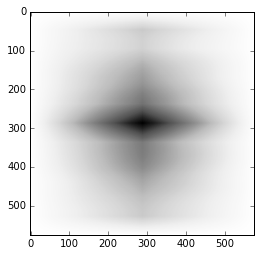

In [27]:
imshow(c12_f, cmap=cm.Greys)

In [15]:
c12_s = correlate2d(im1, im2, mode="same") # not sure about which mode to use

In [40]:
?correlate2d

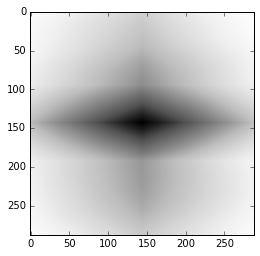

In [26]:
imshow(c12_s, cmap=cm.Greys)

In [37]:
c12rs_s = correlate2d(im1_rs, im2_rs, mode="same") # takes a long time to compute

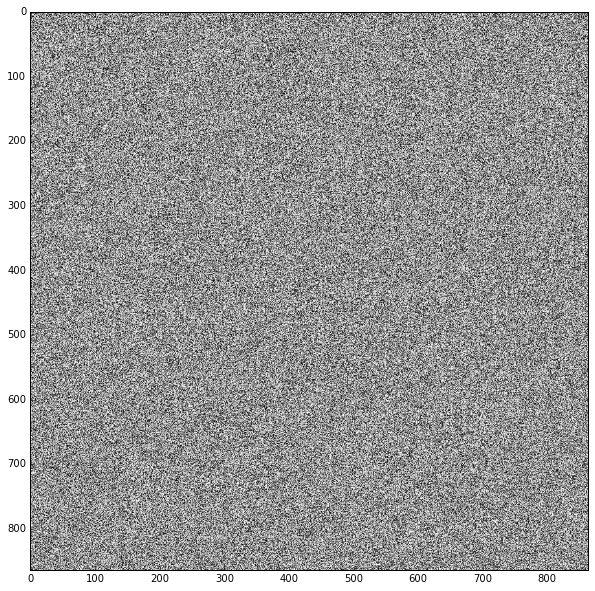

In [39]:
imshow(c12rs_s,cmap=cm.Greys)

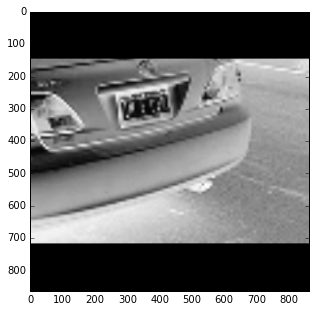

In [46]:
im3=imread("im2-3.png",flatten=True)
im3_rs = sp.misc.imresize(im3,300)
imshow(im3_rs, cmap=cm.Greys)

In [48]:
c13rs_s = correlate2d(im1_rs, im3_rs, mode="same", boundary='symm') # takes a long time to compute

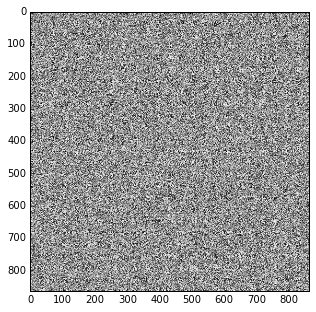

In [49]:
imshow(c13rs_s,cmap=cm.Greys)

In [47]:
?correlate2d

In [16]:
c12_s

array([[  6.49735488e+08,   6.53837888e+08,   6.57907072e+08, ...,
          6.12104832e+08,   6.07876864e+08,   6.03648384e+08],
       [  6.53492416e+08,   6.57643776e+08,   6.61771008e+08, ...,
          6.14868928e+08,   6.10628928e+08,   6.06378560e+08],
       [  6.57368896e+08,   6.61563584e+08,   6.65743616e+08, ...,
          6.17618304e+08,   6.13365504e+08,   6.09096576e+08],
       ..., 
       [  6.54884800e+08,   6.60405440e+08,   6.65916352e+08, ...,
          6.80595584e+08,   6.75561664e+08,   6.70321792e+08],
       [  6.51542592e+08,   6.57040320e+08,   6.62528832e+08, ...,
          6.78824064e+08,   6.73834240e+08,   6.68645760e+08],
       [  6.47977472e+08,   6.53457408e+08,   6.58924672e+08, ...,
          6.77264512e+08,   6.72308736e+08,   6.67155456e+08]], dtype=float32)

In [17]:
c11_s = correlate2d(im1, im1, mode="same") # not sure about which mode to use

In [28]:
c11_f = correlate2d(im1, im1, mode="full") # not sure about which mode to use

In [23]:
correlate2d?

In [19]:
np.array(c11_s)-np.array(c12_s)

array([[  2.28359680e+07,   2.35240960e+07,   2.40986880e+07, ...,
         -1.29240320e+07,  -1.35998720e+07,  -1.42940160e+07],
       [  2.22968320e+07,   2.29811200e+07,   2.35334400e+07, ...,
         -1.19002880e+07,  -1.25940480e+07,  -1.33070080e+07],
       [  2.17839360e+07,   2.24725760e+07,   2.30109440e+07, ...,
         -1.09875200e+07,  -1.17086720e+07,  -1.24469760e+07],
       ..., 
       [ -5.68499200e+07,  -5.74368000e+07,  -5.80540160e+07, ...,
          2.93120000e+04,   2.27584000e+05,   5.13024000e+05],
       [ -5.72656000e+07,  -5.78595200e+07,  -5.84775040e+07, ...,
         -1.46208000e+06,  -1.26278400e+06,  -9.79392000e+05],
       [ -5.74749440e+07,  -5.80706560e+07,  -5.86835200e+07, ...,
         -2.98016000e+06,  -2.77459200e+06,  -2.47539200e+06]], dtype=float32)

In [30]:
shif2 = sp.ndimage.interpolation.shift(im2, np.array(c12_s), mode='wrap')

RuntimeError: sequence argument must have length equal to input rank

In [21]:
imshow(shif2, cmap=cm.Greys)

NameError: name 'shif2' is not defined

In [24]:
# Examples
# Use 2D cross-correlation to find the location of a template in a noisy
# image:

from scipy import signal
from scipy import misc
face = misc.face(gray=True) - misc.face(gray=True).mean()
template = np.copy(face[300:365, 670:750])  # right eye
template -= template.mean()
face = face + np.random.randn(*face.shape) * 50  # add noise
corr = signal.correlate2d(face, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

In [ ]:
import matplotlib.pyplot as plt

/Users/farahshih/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


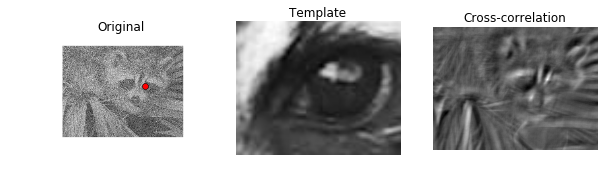

In [36]:
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(1, 3)
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
fig.show()